<a href="https://colab.research.google.com/github/yusain/ML_HomeWork/blob/main/LR_predict_the_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [430]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [431]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [432]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [433]:
pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

In [435]:
data_df = pd.read_csv("https://raw.githubusercontent.com/hwweiCOAIPP/test/main/SimpleWeather.csv", header = 0, sep = ",")

In [436]:
print(data_df)

       Unnamed: 0  Temperature (C)  Apparent Temperature (C)  Humidity  \
0               0         9.472222                  7.388889      0.89   
1               1         9.355556                  7.227778      0.86   
2               2         9.377778                  9.377778      0.89   
3               3         8.288889                  5.944444      0.83   
4               4         8.755556                  6.977778      0.83   
...           ...              ...                       ...       ...   
96448       96448        26.016667                 26.016667      0.43   
96449       96449        24.583333                 24.583333      0.48   
96450       96450        22.038889                 22.038889      0.56   
96451       96451        21.522222                 21.522222      0.60   
96452       96452        20.438889                 20.438889      0.61   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0                14.1197                  

In [437]:
trainD = np.array(data_df[['Apparent Temperature (C)']])
print(trainD)

[[ 7.38888889]
 [ 7.22777778]
 [ 9.37777778]
 ...
 [22.03888889]
 [21.52222222]
 [20.43888889]]


In [438]:
testD = np.array(data_df[['Temperature (C)']])  #data_df[["Temperature (C)]] = Temperature的資料
print(testD)

[[ 9.47222222]
 [ 9.35555556]
 [ 9.37777778]
 ...
 [22.03888889]
 [21.52222222]
 [20.43888889]]


In [439]:
# to numpy array
arryD = data_df.to_numpy()

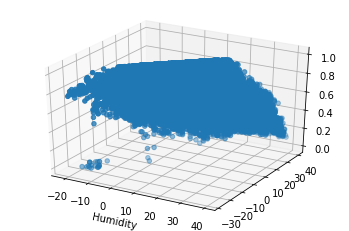

In [442]:
# matplot
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
Temperature  = arryD[0::,1]
ApparentTemperature  = arryD[0::,2]
Humidity = arryD[0::,3]

ax.set_xlabel('Temperature')
ax.set_xlabel('ApparentTemperature')
ax.set_xlabel('Humidity')
ax.scatter(Temperature,ApparentTemperature,Humidity,cmap='Reds',label='TH_3D',marker='o')

In [443]:
X_train, X_test, y_train, y_test = train_test_split(trainD, testD, test_size=0.2, random_state=42)

In [444]:
print(X_train.shape)
print(X_test.shape)
std_Xtrain=StandardScaler().fit_transform(X_train)
std_Xtest=StandardScaler().fit_transform(X_test)
std_ytrain=StandardScaler().fit_transform(y_train.reshape(-1, 1))
std_ytest=StandardScaler().fit_transform(y_test.reshape(-1, 1))

(77162, 1)
(19291, 1)


In [445]:
LR=LinearRegression()
LR.fit(std_Xtrain,std_ytrain)
print('the value of default measurement of linear regression',
      LR.score(std_Xtrain,std_ytrain))
train_pred=LR.predict(std_Xtrain)
test_pred=LR.predict(std_Xtest)

the value of default measurement of linear regression 0.9852649438621494


In [446]:
print('MSE train:%.3f,test:%.3f'%(mean_squared_error(std_ytrain,train_pred)
                                  ,mean_squared_error(std_ytest,test_pred)))

MSE train:0.015,test:0.015


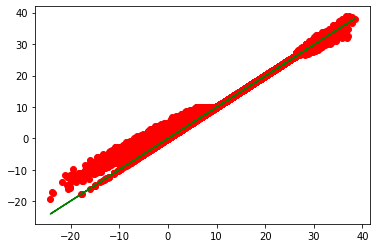

In [447]:
y_pred = LR.predict(X_test)
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()